# 35.学習データとテストデータが同じ場合

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ken.nakano/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/ken.nakano/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
N = 500
X = np.random.uniform(low=0, high=1, size=[N,2])
y = np.random.choice([0,1], size=N)

In [4]:
X

array([[  4.74511058e-01,   3.09079933e-02],
       [  3.63006782e-01,   2.90324145e-01],
       [  6.25204331e-01,   5.62499711e-01],
       [  7.82577265e-01,   6.68558904e-01],
       [  4.03552644e-01,   1.88526198e-01],
       [  2.89823840e-01,   7.79937933e-01],
       [  9.76887789e-01,   9.93980617e-01],
       [  5.92319573e-01,   6.33912980e-02],
       [  9.03034070e-01,   6.07985201e-01],
       [  9.02405985e-01,   6.73260892e-01],
       [  2.79626901e-01,   8.04227761e-01],
       [  7.07785082e-01,   1.88405780e-01],
       [  1.98352499e-01,   9.64350262e-01],
       [  8.68869615e-02,   8.40830927e-01],
       [  4.88477563e-01,   7.79256656e-01],
       [  8.50676479e-01,   1.75483194e-01],
       [  2.16564248e-01,   1.39249498e-01],
       [  5.28151097e-01,   7.07585462e-01],
       [  6.39912457e-01,   6.25954085e-01],
       [  5.60036887e-01,   6.39285639e-01],
       [  1.54009503e-01,   6.52224075e-01],
       [  1.49348248e-01,   1.98481435e-01],
       [  

In [5]:
y

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0,

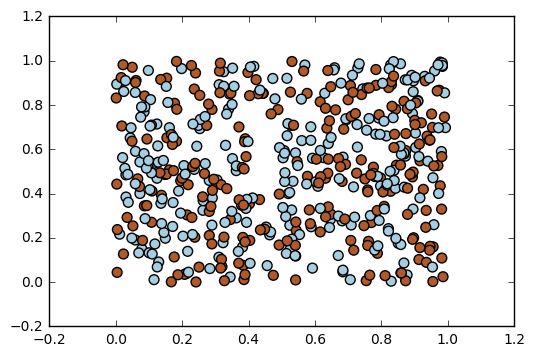

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired)

In [9]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

In [14]:
X_train, X_test = X, X
y_train, y_test = y, y

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
clf.score(X_test, y_test) # 過学習！

1.0

In [18]:
X_test2 = np.random.uniform(low=0, high=1, size=[N,2])
y_test2 = np.random.choice([0,1], size=N)

In [19]:
clf.score(X_test2, y_test2)

0.50800000000000001

# 36.Hold-out

In [27]:
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression()

from sklearn.cross_validation import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [33]:
X_train.shape, X_test.shape

((284, 30), (285, 30))

In [34]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
clf.score(X_test, y_test)

0.91929824561403506

In [40]:
# データを大きく
from os.path import join, exists
from os import makedirs
from sklearn.datasets import get_data_home, mldata_filename
from urllib.request import urlretrieve
 
data_home = join(get_data_home(), 'mldata') # データ保管場所
makedirs(data_home, exist_ok=True) # 保管ディレクトリを作成
 
filename = join(data_home, mldata_filename('MNIST original') + '.mat') # ダウンロードファイル名
if not exists(filename):
    urlretrieve("https://raw.githubusercontent.com/amplab/datascience-sp14/master/lab7/mldata/mnist-original.mat", filename) # ダウンロード

In [41]:
mnist = fetch_mldata('MNIST original')

In [42]:
mnist.COL_NAMES

['label', 'data']

In [43]:
mnist.DESCR

'mldata.org dataset: mnist-original'

In [45]:
mnist.data.shape

(70000, 784)

In [47]:
mnist.target # 10クラス問題

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [48]:
# MNISTは60000が学習, 10000がテストと決まっている

X_train = mnist.data[:60000]
X_test = mnist.data[60000:70000]

y_train = mnist.target[:60000]
y_test = mnist.target[60000:70000]

In [49]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
# clf.fit(X_train, y_train) # これは1時間くらい回しても終わらない

# 37.Hold-out2 : stratified

In [53]:
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression()

from sklearn.cross_validation import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [55]:
X_train.shape, X_test.shape

((284, 30), (285, 30))

In [56]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
clf.score(X_test, y_test)

0.93684210526315792

In [67]:
scores = []

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
    
scores

[0.94736842105263153,
 0.94035087719298249,
 0.93684210526315792,
 0.95789473684210524,
 0.95438596491228067,
 0.94736842105263153,
 0.94035087719298249,
 0.96491228070175439,
 0.94385964912280707,
 0.93684210526315792]

In [68]:
sum(scores) / len(scores)

0.94701754385964931

(array([ 2.,  2.,  1.,  2.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([ 0.93684211,  0.93964912,  0.94245614,  0.94526316,  0.94807018,
         0.95087719,  0.95368421,  0.95649123,  0.95929825,  0.96210526,
         0.96491228]),
 <a list of 10 Patch objects>)

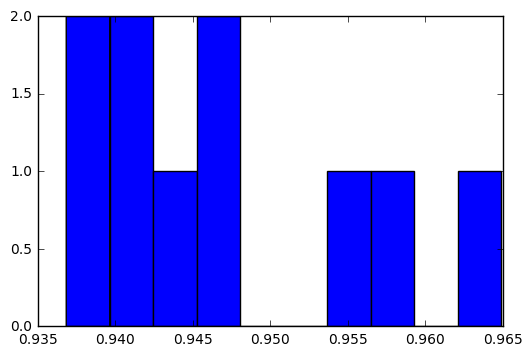

In [71]:
plt.hist(scores)

In [79]:
# クラスのバランスが崩れたらどうなるか
scores = []
rates = []

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95)
    rate = sum(y_test) / len(y_test)
    rates.append(rate)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [78]:
rates

[0.65517241379310343,
 0.62068965517241381,
 0.55172413793103448,
 0.65517241379310343,
 0.68965517241379315,
 0.41379310344827586,
 0.68965517241379315,
 0.48275862068965519,
 0.72413793103448276,
 0.58620689655172409]

In [80]:
scores

[0.93103448275862066,
 1.0,
 1.0,
 1.0,
 0.96551724137931039,
 1.0,
 0.93103448275862066,
 1.0,
 0.89655172413793105,
 0.96551724137931039]

In [81]:
# 層化（stratify)
scores = []
rates = []

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95, stratify=y)
    rate = sum(y_test) / len(y_test)
    rates.append(rate)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [83]:
rates

[0.62068965517241381,
 0.62068965517241381,
 0.62068965517241381,
 0.62068965517241381,
 0.62068965517241381,
 0.62068965517241381,
 0.62068965517241381,
 0.62068965517241381,
 0.62068965517241381,
 0.62068965517241381]

In [84]:
scores

[0.93103448275862066,
 0.86206896551724133,
 1.0,
 0.89655172413793105,
 1.0,
 0.96551724137931039,
 0.93103448275862066,
 0.96551724137931039,
 0.96551724137931039,
 0.89655172413793105]

# 38.cross validation, stratified 10-fold CV

In [103]:
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [105]:
from sklearn.cross_validation import KFold

In [120]:
for train_index, test_index in KFold(len(y), 5):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.912280701754
0.947368421053
0.973684210526
0.973684210526
0.955752212389


In [116]:
from sklearn.cross_validation import StratifiedKFold

In [125]:
# 層化

i = 1

for train_index, test_index in StratifiedKFold(y, 5):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('{}. Score:{}'.format(i, score))
    i += 1

1. Score:0.9304347826086956
2. Score:0.9391304347826087
3. Score:0.9734513274336283
4. Score:0.9469026548672567
5. Score:0.9646017699115044


In [126]:
# 上記のことを簡単にやってくれるオブジェクトがある
from sklearn.cross_validation import cross_val_score

ave_score = cross_val_score(clf, X, y, cv=10) # Stratified 

In [128]:
ave_score.mean()

0.95089987900786443

# 39. Leave One Out, Leave-p-out, Leave-one-group-out

In [2]:
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [3]:
from sklearn.cross_validation import LeaveOneOut
loocv = LeaveOneOut(len(y))

In [4]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf, X, y, cv=loocv) # Stratified 

In [5]:
scores.mean(), scores.std(), scores.size

(0.95079086115992972, 0.21630441395100791, 569)

In [6]:
# leave-p-out

from sklearn.cross_validation import LeavePOut
loocv = LeavePOut(len(y), 2)

In [ ]:
# すごく時間がかかる
# from sklearn.cross_validation import cross_val_score

# scores = cross_val_score(clf, X, y, cv=loocv) # Stratified 

In [8]:
scores.size

569

In [9]:
# leave-one-group-out
group = np.array(list(range(50))*12)
group = np.sort(group[:y.size])

In [10]:
group.size

569

In [12]:
group

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [18]:
# leave-one-group-out

from sklearn.cross_validation import LeaveOneLabelOut
loocv = LeaveOneLabelOut(y)

In [19]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf, X, y, cv=loocv) # Stratified 

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

# 40.学習データ・検証データとテストデータ


In [2]:
import numpy as np

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [3]:
from sklearn.cross_validation import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [6]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [8]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10)

In [9]:
scores.mean()

0.94521122417514647

In [17]:
C_range_exp = np.linspace(-15, 20, 36)

In [18]:
C_range = 10 ** C_range_exp

In [19]:
all_scores_mean = []
all_scores_std = []

for C in C_range:
    clf.C = C
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    all_scores_mean.append(scores.mean())
    all_scores_std.append(scores.std())

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 3 artists>

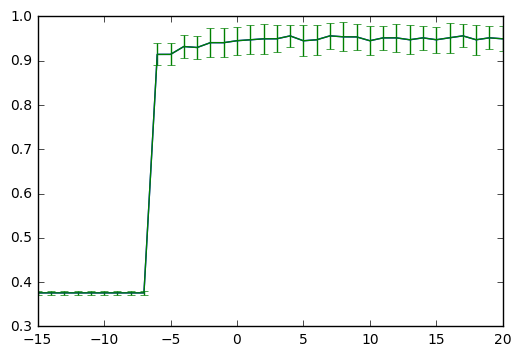

In [25]:
plt.plot(C_range_exp, all_scores_mean)

plt.errorbar(C_range_exp, all_scores_mean, yerr=all_scores_std)

In [28]:
max(all_scores_mean)

0.95617740775002569

In [29]:
max_index = np.argmax(all_scores_mean)

In [30]:
max_index

22

In [31]:
C_range_exp[max_index]

7.0

In [32]:
clf.C = 10 ** C_range_exp[max_index]

In [33]:
clf.fit(X_train, y_train)

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [34]:
clf.score(X_test, y_test)

0.97368421052631582

In [37]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.96491228070175439